# Project Capstone: Fraud Detection on Auto Insurance Claims
**Notebook 1: Problem Statement, SQL ETL and Understanding Data**

# INTRODUCTION

## PROBLEM STATEMENT

Insurance fraud incurs losses to insurance company. Hence, in this project, I am tasked to develop a model to help auto insurance company to save cost by predicting whether insurance claims is fraudulent or not.

The model is expected to predict if insurance claim is fraudulent based on unseen data, accurately. Metrics used to assess model's prediction are both F1 score and area under curve of the ROC (ROC AUC). These metrics will be compared against a baseline model fraud prediction of F1 score and ROC AUC at 40% and above 50% respectively. 

## BACKGROUND

Insurance is a contract, represented by a policy, in which a policyholder receives financial protection or reimbursement against losses from an insurance company. The losses, both big and small, may result from damage to the insured or their property, or from liability for damage or injury caused to a third party. Most insurance policies are made up of core components including premium, deductible and policy limit ([source](https://www.investopedia.com/terms/i/insurance.asp)). 

There are many types of insurance policies and auto insurance is one of the most common types of insurance. Insurance industry is massive in the United States and car insurance is required by law ([source](https://www.investopedia.com/terms/i/insurance.asp)). Each year, more than 7,000 companies collect over \\$1 trillion in premiums. Unfortunately, the industry also provides more opportunities and bigger incentives for committing insurance fraud with total cost of insurance fraud (non-health insurance) estimated to be more than \\$40 billion per year. This insurance fraud cost translates to increase in premium ranging from \\$400 and \\$700 per year for the average U.S family ([source](https://www.fbi.gov/stats-services/publications/insurance-fraud)).

By auto insurance alone, fraud already costs auto insurers to lose at least $29 billion a year to staged-crash scams ([source](https://www.fbi.gov/stats-services/publications/insurance-fraud)). Common insurance frauds include inflating claims; misrepresenting facts on an insurance application; submitting claims for injuries or damage that never occurred; and staging accidents ([source](https://www.iii.org/article/background-on-insurance-fraud)).

![image.png](./images/insurance_fraud_statistics.png)

Because of severity of insurance fraud, 78% of the consumers have expressed their concern about insurance fraud. In addition, 48 states has made insurance fraud a specific crime ([source](https://insurancefraud.org/fraud-stats)).

![image.png](./images/consumer_attitudes_state_laws.png)

## DATASET

Dataset below is used for analysis and is obtained from [Kaggle](https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data/):

| Dataset | Description |
|---|---|
| insurance_claims.csv | Contains data relating to `months_as_customer`, `age`, `policy_number`, `policy_bind_date`, `policy_state`, `policy_csl`, `policy_deductable`, `policy_annual_premium`, `umbrella_limit`, `insured_zip`, `insured_sex`, `insured_education_level`, `insured_occupation`, `insured_hobbies`, `insured_relationship`, `capital-gains`, `capital-loss`, `incident_date`, `incident_type`, `collision_type`, `incident_severity`, `authorities_contacted`, `incident_state`, `incident_city`, `incident_location`, `incident_hour_of_the_day`, `number_of_vehicles_involved`, `property_damage`, `bodily_injuries`, `witnesses`, `police_report_available`, `total_claim_amount`, `injury_claim`, `property_claim`,`vehicle_claim`, `auto_make`, `auto_model`, `auto_year`, `fraud_reported` and `_c39`

This dataset consist of 39 columns and 1000 rows with auto insurance claims records from Ohio, Illinois and Indiana from 01 January 2015 to 01 March 2015.

## TABLE OF CONTENTS

**1. Understanding Data (This Notebook)** <br>
- [SQL ETL](#SQL-ETL) <br>
- [Understanding Data](#Understanding-Data) <br>
- [Key Finding](#Key-Finding) <br>

**2. Preprocessing** <br>
**3. Feature Engineering, Modelling, Feature Selection, Hyperparameter Tuning and Final Model** <br>
**4. Fraud Claim Analysis, Conclusion & Recommendations** <br>

# SQL ETL

Data is extracted and transformed with SQL and Python. Then, data is used for details analysis using Python and Tableau.

### Import Libraries

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

### Import Data

In [2]:
# Read data from csv file.
auto_insurance_dataframe = pd.read_csv("./datasets/auto_insurance_claims_data.csv")

### Visualize Data

In [3]:
# Print shape of dataframe.
print(f'Shape: {auto_insurance_dataframe.shape}')

# Increase display range for easier viewing.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Display first 3 rows of dataframe.
auto_insurance_dataframe.head(3)

Shape: (1000, 40)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


### Prepare Data for SQL Database

Schema of database:

<img src="./images/schema.png" alt="schema" width="900"/>


**1000 incident records from auto insurance are split into respective tables above. ```incident_record_id``` column (join key) will be created before import to SQL:**
* policy_details: 7 columns + 1 join key (incident_record_id)
* insured_details: 8 columns + 1 join key (incident_record_id)
* claim_details: 25 columns + 1 join key (incident_record_id)

#### Create tables and import into SQL database
These dataframes will be imported as tables into SQL database.

##### ```policy_details``` Table

In [4]:
# Subset single columns.
policy_details = auto_insurance_dataframe.filter(items=['policy_number', 
                                                        'policy_bind_date', 
                                                        'policy_state', 
                                                        'policy_csl', 
                                                        'policy_deductable',
                                                        'policy_annual_premium',
                                                        'umbrella_limit'])

# Insert new column for incident_record_id as join key.
policy_details.insert(0, 'incident_record_id', range(1, 1 + len(policy_details)))

# Print shape of subset.
print(f'Shape: {policy_details.shape}')

# Display first 3 rows of subset. 
policy_details.head(3)

Shape: (1000, 8)


,incident_record_id,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit
0,1,521585,2014-10-17,OH,250/500,1000,1406.91,0
1,2,342868,2006-06-27,IN,250/500,2000,1197.22,5000000
2,3,687698,2000-09-06,OH,100/300,2000,1413.14,5000000


In [5]:
# Display last 3 rows of subset.
policy_details.tail(3)

,incident_record_id,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit
997,998,918516,2003-02-17,OH,250/500,500,1383.49,3000000
998,999,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000
999,1000,556080,1996-11-11,OH,250/500,1000,766.19,0


##### ```insured_details``` Table

In [6]:
# Subset single columns.
insured_details = auto_insurance_dataframe.filter(items=['months_as_customer', 
                                                         'age', 
                                                         'insured_zip', 
                                                         'insured_sex', 
                                                         'insured_education_level',
                                                         'insured_occupation',
                                                         'insured_hobbies', 
                                                         'insured_relationship'])

# Insert new column for incident_record_id as join key.
insured_details.insert(0, 'incident_record_id', range(1, 1 + len(insured_details)))

# Print shape of subset.
print(f'Shape: {insured_details.shape}')

# Display first 3 rows of subset.
insured_details.head(3)

Shape: (1000, 9)


,incident_record_id,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship
0,1,328,48,466132,MALE,MD,craft-repair,sleeping,husband
1,2,228,42,468176,MALE,MD,machine-op-inspct,reading,other-relative
2,3,134,29,430632,FEMALE,PhD,sales,board-games,own-child


In [7]:
# Display last 3 rows of subset.
insured_details.tail(3)

,incident_record_id,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship
997,998,130,34,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative
998,999,458,62,441714,MALE,Associate,handlers-cleaners,base-jumping,wife
999,1000,456,60,612260,FEMALE,Associate,sales,kayaking,husband


##### ```claim_details``` Table

In [8]:
# Subset single columns.
claim_details = auto_insurance_dataframe.filter(items=['capital-gains', 
                                                       'capital-loss', 
                                                       'incident_date', 
                                                       'incident_type', 
                                                       'collision_type',
                                                       'incident_severity',
                                                       'authorities_contacted', 
                                                       'incident_state', 
                                                       'incident_city',
                                                       'incident_location',
                                                       'incident_hour_of_the_day',
                                                       'number_of_vehicles_involved',
                                                       'property_damage',
                                                       'bodily_injuries',
                                                       'witnesses',
                                                       'police_report_available',
                                                       'total_claim_amount',
                                                       'injury_claim',
                                                       'property_claim',
                                                       'vehicle_claim',
                                                       'auto_make',
                                                       'auto_model',
                                                       'auto_year',
                                                       'fraud_reported',
                                                       '_c39'])

# Insert new column for incident_record_id as join key.
claim_details.insert(0, 'incident_record_id', range(1, 1 + len(claim_details)))

# Print shape of subset.
print(f'Shape: {claim_details.shape}')

# Display first 3 rows of subset.
claim_details.head(3)

Shape: (1000, 26)


,incident_record_id,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,1,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,2,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,3,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [9]:
# Display last 3 rows of subset.
claim_details.tail(3)

,incident_record_id,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
997,998,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,999,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,1000,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


##### Create Database and Import Tables

In [10]:
# Create DB file and connection.
auto_insurance_sql = sqlite3.connect('./sql/auto_insurance_database')

In [11]:
# Import tables into SQL.
policy_details.to_sql(name='policy_details',con=auto_insurance_sql, index=False, if_exists='replace')
insured_details.to_sql(name='insured_details',con=auto_insurance_sql, index=False, if_exists='replace')
claim_details.to_sql(name='claim_details',con=auto_insurance_sql, index=False, if_exists='replace')

1000

Visualise `policy_details` Table

In [12]:
# Query first 3 row of policy_details.
sql_query = '''
SELECT * 
FROM policy_details
LIMIT 3
'''
pd.read_sql(sql_query,auto_insurance_sql)

,incident_record_id,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit
0,1,521585,2014-10-17,OH,250/500,1000,1406.91,0
1,2,342868,2006-06-27,IN,250/500,2000,1197.22,5000000
2,3,687698,2000-09-06,OH,100/300,2000,1413.14,5000000


In [13]:
# Query last 3 rows of policy_details.
sql_query = '''
SELECT * 
FROM policy_details
ORDER BY incident_record_id DESC
LIMIT 3
'''
pd.read_sql(sql_query,auto_insurance_sql)

,incident_record_id,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit
0,1000,556080,1996-11-11,OH,250/500,1000,766.19,0
1,999,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000
2,998,918516,2003-02-17,OH,250/500,500,1383.49,3000000


In [14]:
# Query count of rows in policy_details.
sql_query = '''
SELECT COUNT(*) 
FROM policy_details
'''
pd.read_sql(sql_query,auto_insurance_sql)

,COUNT(*)
0,1000


Visualise `insured_details` Table

In [15]:
# Query first 3 rows of insured_details.
sql_query = '''
SELECT * 
FROM insured_details
LIMIT 3
'''
pd.read_sql(sql_query,auto_insurance_sql)

,incident_record_id,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship
0,1,328,48,466132,MALE,MD,craft-repair,sleeping,husband
1,2,228,42,468176,MALE,MD,machine-op-inspct,reading,other-relative
2,3,134,29,430632,FEMALE,PhD,sales,board-games,own-child


In [16]:
# Query last 3 rows of insured_details.
sql_query = '''
SELECT * 
FROM insured_details
ORDER BY incident_record_id DESC
LIMIT 3
'''
pd.read_sql(sql_query,auto_insurance_sql)

,incident_record_id,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship
0,1000,456,60,612260,FEMALE,Associate,sales,kayaking,husband
1,999,458,62,441714,MALE,Associate,handlers-cleaners,base-jumping,wife
2,998,130,34,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative


In [17]:
# Query count of rows in insured_details.
sql_query = '''
SELECT COUNT(*) 
FROM insured_details
'''
pd.read_sql(sql_query,auto_insurance_sql)

,COUNT(*)
0,1000


Visualise `claim_details` Table

In [18]:
# Query first 3 rows of claim_details.
sql_query = '''
SELECT * 
FROM claim_details
LIMIT 3
'''
pd.read_sql(sql_query,auto_insurance_sql)

,incident_record_id,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,1,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,None
1,2,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,None
2,3,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,None


In [19]:
# Query last 3 rows of claim_details.
sql_query = '''
SELECT * 
FROM claim_details
ORDER BY incident_record_id DESC
LIMIT 3
'''
pd.read_sql(sql_query,auto_insurance_sql)

,incident_record_id,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,1000,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,None
1,999,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,None
2,998,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,None


In [20]:
# Query count of rows in claim_details.
sql_query = '''
SELECT COUNT(*) 
FROM claim_details
'''
pd.read_sql(sql_query,auto_insurance_sql)

,COUNT(*)
0,1000


##### Export SQL Server Tables to CSV using Python

In [21]:
# Query all records of policy_details.
sql_query = '''
SELECT * 
FROM policy_details
'''
policy_details_table = pd.read_sql(sql_query,auto_insurance_sql)

# Query all records of insured_details.
sql_query = '''
SELECT * 
FROM insured_details
'''
insured_details_table = pd.read_sql(sql_query,auto_insurance_sql)

# Query all records of claim_details.
sql_query = '''
SELECT * 
FROM claim_details
'''
claim_details_table = pd.read_sql(sql_query,auto_insurance_sql)

# Merge both policy_details and insured_details.
policy_details_and_insured_details_table = pd.merge(policy_details_table, insured_details_table, on="incident_record_id")

# Merge both policy_details_and_insured_details_table and claim_details_table.
auto_insurance_table = pd.merge(policy_details_and_insured_details_table, claim_details_table, on="incident_record_id")

# Extract auto_insurance_table to csv.
auto_insurance_table.to_csv ('./datasets/auto_insurance_sql.csv', index = False)

# Understanding Data

### Data Overview

In [22]:
# Read data from csv file.
auto_insurance_dataframe = pd.read_csv("./datasets/auto_insurance_sql.csv")

# Summary of dataframe.
print("********************************************************")
print("       Summary of Auto Insurance Dataframe              ")
print("********************************************************")
auto_insurance_dataframe.info()

********************************************************
       Summary of Auto Insurance Dataframe              
********************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   incident_record_id           1000 non-null   int64  
 1   policy_number                1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   months_as_customer           1000 non-null   int64  
 9   age                          1000 non-null   int64  
 10  insured_zip           

**Observation:** 
- There are 41 columns and 1,000 rows in this dataframe.
- There are 20 columns wtih numerical data (2 columns with float64 data type; 17 columns with int64 data type) and 21 columns with categorical data.
- Data type of both columns `policy_bind_date` and `incident_date` is object. It will be converted to datetime later.
- Data type of column `policy_csl` is object. It will be investigated and cleaned later. 
- Whole column `_c39` has null values. It will be investigated and cleaned later. 

In [23]:
# Print number of rows and columns in dataframe.
print(f"Shape:", auto_insurance_dataframe.shape)

Shape: (1000, 41)


In [24]:
# Display first 3 rows of auto insurance dataframe.
auto_insurance_dataframe.head(3)

,incident_record_id,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,1,521585,2014-10-17,OH,250/500,1000,1406.91,0,328,48,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,2,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,228,42,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,3,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,134,29,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [25]:
# Display last 3 rows of auto insurance dataframe.
auto_insurance_dataframe.tail(3)

,incident_record_id,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,months_as_customer,age,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
997,998,918516,2003-02-17,OH,250/500,500,1383.49,3000000,130,34,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,999,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,458,62,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,1000,556080,1996-11-11,OH,250/500,1000,766.19,0,456,60,612260,FEMALE,Associate,sales,kayaking,husband,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [26]:
# Show summary of auto insurance dataframe statistics.
auto_insurance_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
incident_record_id,1000.0,5.005000e+02,2.888194e+02,1.00,250.7500,500.5,750.250,1000.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00


Observations:
- Column umbrella_limit minimum value is -1,000,000. It could be a typo as umbrella_limit should be a positive value as it refers to limit of umbrella insurance that provides protection beyond existing limits and coverages of other policies ([source](https://www.geico.com/information/aboutinsurance/umbrella/#:~:text=Umbrella%20insurance%20is%20extra%20insurance,lawsuits%2C%20and%20personal%20liability%20situations.)). This will be investigated and cleaned later.
- Column `_c39` has null values. This column will be cleaned later.
- Columns `months_as_customer`, `age`, `policy_number`, `policy_deductable`, `umbrella_limit`, `insured_zip`, `capital-gains`, `number_of_vehicles_involved`, `witnesses`, `injury_claim`, `property_claim` and `auto_year` data skewed to the right as average value of all data is higher than the middle point of all data in respective column.
- Columns `policy_annual_premium`, `capital-loss`, `incident_hour_of_the_day`, `bodily_injuries`, `total_claim_amount` and `vehicle_claim` data skewed to the left as average value of all data is lower than the middle point of all data in respective column.
- Average age of customer was about 39 years old (rounded to nearest number).
- Average number of months customer had insurance coverage was about 204. This translates to about 17 years.
- Average policy annual premium was about \\$1,256 (rounded to nearest number).
- Average number of vehicles involved in incidents was about 2 (rounded to nearest number).
- Average number of bodily injuries reported in incidents was about 1 (rounded to nearest number).
- Average number of witnesses involved in incidents was about 1 (rounded to nearest number).
- Average total claim amount was about \\$52,762 (rounded to nearest number).
- Average injury claim amount was about \\$7,433 (rounded to nearest number).
- Average property claim amount was about \\$7,400 (rounded to nearest number).
- Average vehicle claim amount was about \\$37,929 (rounded to nearest number).
- Average vehicle manufactured year was in year 2005.

In [27]:
# Check, sort and export number of null/missing values present in each column of auto insurance dataframe to csv file.
count_of_null_values = auto_insurance_dataframe.isnull().sum().sort_values(ascending = False).to_csv('./datasets/count_of_null_values.csv', index = True)

Histogram below is created using Tableau with data from count_of_null_values csv file.

![image.png](./images/tableau_count_of_null_values.png)

**Observation:** 
- Only column `_c39` has rows with missing/null values. In total, there are 1,000 rows with missing/nulls values. This column will be cleaned later. 

In [28]:
# Check, sort and export number of unique values present in each column of the dataframe to csv file.
count_of_unique_values = auto_insurance_dataframe.nunique().sort_values(ascending = False).to_csv('./datasets/count_of_unique_values.csv', index = True)

Histogram chart below is created using Tableau with data from count_of_unique_values csv file.

![image.png](./images/tableau_count_of_unique_values.png)

**Observation:** 
- Both columns `incident_location` and `policy_number` have 1,000 unique values.
- Data types for columns, whose unique values range from 338 to 1,000, are either numerical or datetime.  
- Count of unique values for categorical columns ranges from 2 to 39.

### Check for Duplicate Values

In [29]:
# Find duplicate rows across all columns
duplicate_rows = auto_insurance_dataframe[auto_insurance_dataframe.duplicated()]

print("Observation:")

# Check if there is duplicate record and print respective message accordingly.
if duplicate_rows.empty:
    print("There is no record with duplicate value.")
else:
    print("There is record with duplicate value.")

Observation:
There is no record with duplicate value.


### Check for Unique Values

In [30]:
# Store columns with object as data type.
object_columns = auto_insurance_dataframe.select_dtypes(include=['object']).columns

# Remove both columns 'policy_bind_date' and 'incident_date' as their data types are datetime and not object.
# Sort the columns in ascending order.
object_columns = object_columns.drop(['policy_bind_date', 'incident_date']).sort_values()

# Convert to list.
object_columns = list(object_columns)

# Check number of unique values in each column of object_columns list.
print("**************************************************************")
for column_index in range(len(object_columns)):
    unique_value = auto_insurance_dataframe[object_columns[column_index]].unique()
    print(f"Number of unique values in column {object_columns[column_index]}:", len(unique_value), "\n")
    unique_value = pd.DataFrame(unique_value, columns=[object_columns[column_index]])
    print(unique_value, "\n")
    print("**************************************************************")

**************************************************************
Number of unique values in column authorities_contacted: 5 

  authorities_contacted
0                Police
1                  None
2                  Fire
3                 Other
4             Ambulance 

**************************************************************
Number of unique values in column auto_make: 14 

     auto_make
0         Saab
1     Mercedes
2        Dodge
3    Chevrolet
4       Accura
5       Nissan
6         Audi
7       Toyota
8         Ford
9       Suburu
10         BMW
11        Jeep
12       Honda
13  Volkswagen 

**************************************************************
Number of unique values in column auto_model: 39 

        auto_model
0              92x
1             E400
2              RAM
3            Tahoe
4              RSX
5               95
6       Pathfinder
7               A5
8            Camry
9             F150
10              A3
11      Highlander
12            Neon
13        

**Observation:** 
- Columns `collision_type`, `police_report_available` and `property_damage` have "?" as one of the unique values. These 3 columns will be investigated later.
- Column `policy_csl` data type is object because there of "/". ([source](https://www.newlinlaw.com/tractor-trailer-accident-faqs/combined-single-limit-csl-policy)). This column will be investigated later.
- There are 1,000 unique values in column `incident_location`. It means none of the incident occured at a same location.

### Check for Special Character "?"

In [31]:
# Function to check special characters in a specific column in dataframe.
def check_special_characters(dataframe, column_name):
    
    # Select specific column in dataframe.
    dataframe = dataframe[[column_name]]
    
    # Initiate list with special character '?'. 
    special_character_list = ["\?"]
    
    dict = {}
    
    # loop through the column to search for special character '?'.
    for special_character in range(len(special_character_list)):
           
            # Find the number of appearance of unique character in column.
            dict[special_character_list[special_character][1:]] = len(dataframe[dataframe.select_dtypes('object').apply(lambda x: x.str.contains(special_character_list[special_character],regex=True)).any(axis=1)])
    
    # Print number of special character '?' in respective column.
    print(f"Count of rows with special character '?':", dict[special_character_list[special_character][1:]])
    
    # Print percentage of special character '?' in respective column.
    print(f"Percentage of rows with special characters '?':", '{:.0%}'.format(dict[special_character_list[special_character][1:]]/dataframe.shape[0]))

In [32]:
# Initiate a list to store columns with special character '?'.
column_with_special_character = ["collision_type", "police_report_available", "property_damage"]

# Loop through the list that contains columns with special character '?'.
for column_index in range(len(column_with_special_character)):
    print("*****************************************************************************")
    print("Column:", column_with_special_character[column_index])
    check_special_characters(dataframe = auto_insurance_dataframe, column_name = column_with_special_character[column_index])
print("*****************************************************************************")

*****************************************************************************
Column: collision_type
Count of rows with special character '?': 178
Percentage of rows with special characters '?': 18%
*****************************************************************************
Column: police_report_available
Count of rows with special character '?': 343
Percentage of rows with special characters '?': 34%
*****************************************************************************
Column: property_damage
Count of rows with special character '?': 360
Percentage of rows with special characters '?': 36%
*****************************************************************************


**Observation:** 
- Columns `collision_type`, `police_report_available` and `property_damage` have high number of rows with special character "?" ranging from 18% to 36% of total rows in these 3 columns. These rows will be investigated later.

### Check for Outliers

In [33]:
# Function to create boxplot and histogram.
def boxplot_histplot(dataframe, number_of_rows, number_of_columns, data_type):

    # Create a list to store object type.
    data_type_list = data_type
    
    # Create an object to store numerical columns.
    all_columns = dataframe.select_dtypes(include= data_type_list).columns

    # Set figure-level attributes as (15, 25).
    fig, ax = plt.subplots(number_of_rows, number_of_columns, figsize = (15, 35))

    # Loop through all numerical columns.
    for column_index in range(len(all_columns)):
        
        # Draw box plot.
        sns.boxplot(data = dataframe, x = all_columns[column_index], ax = ax[column_index,0], color='skyblue')
        
        # Draw histogram.
        sns.histplot(dataframe[all_columns[column_index]], ax = ax[column_index,1], color='skyblue')

    # Tight_layout automatically adjusts subplot params so that the subplots fit in to the figure area. 
    plt.tight_layout()

**Numerical Columns**

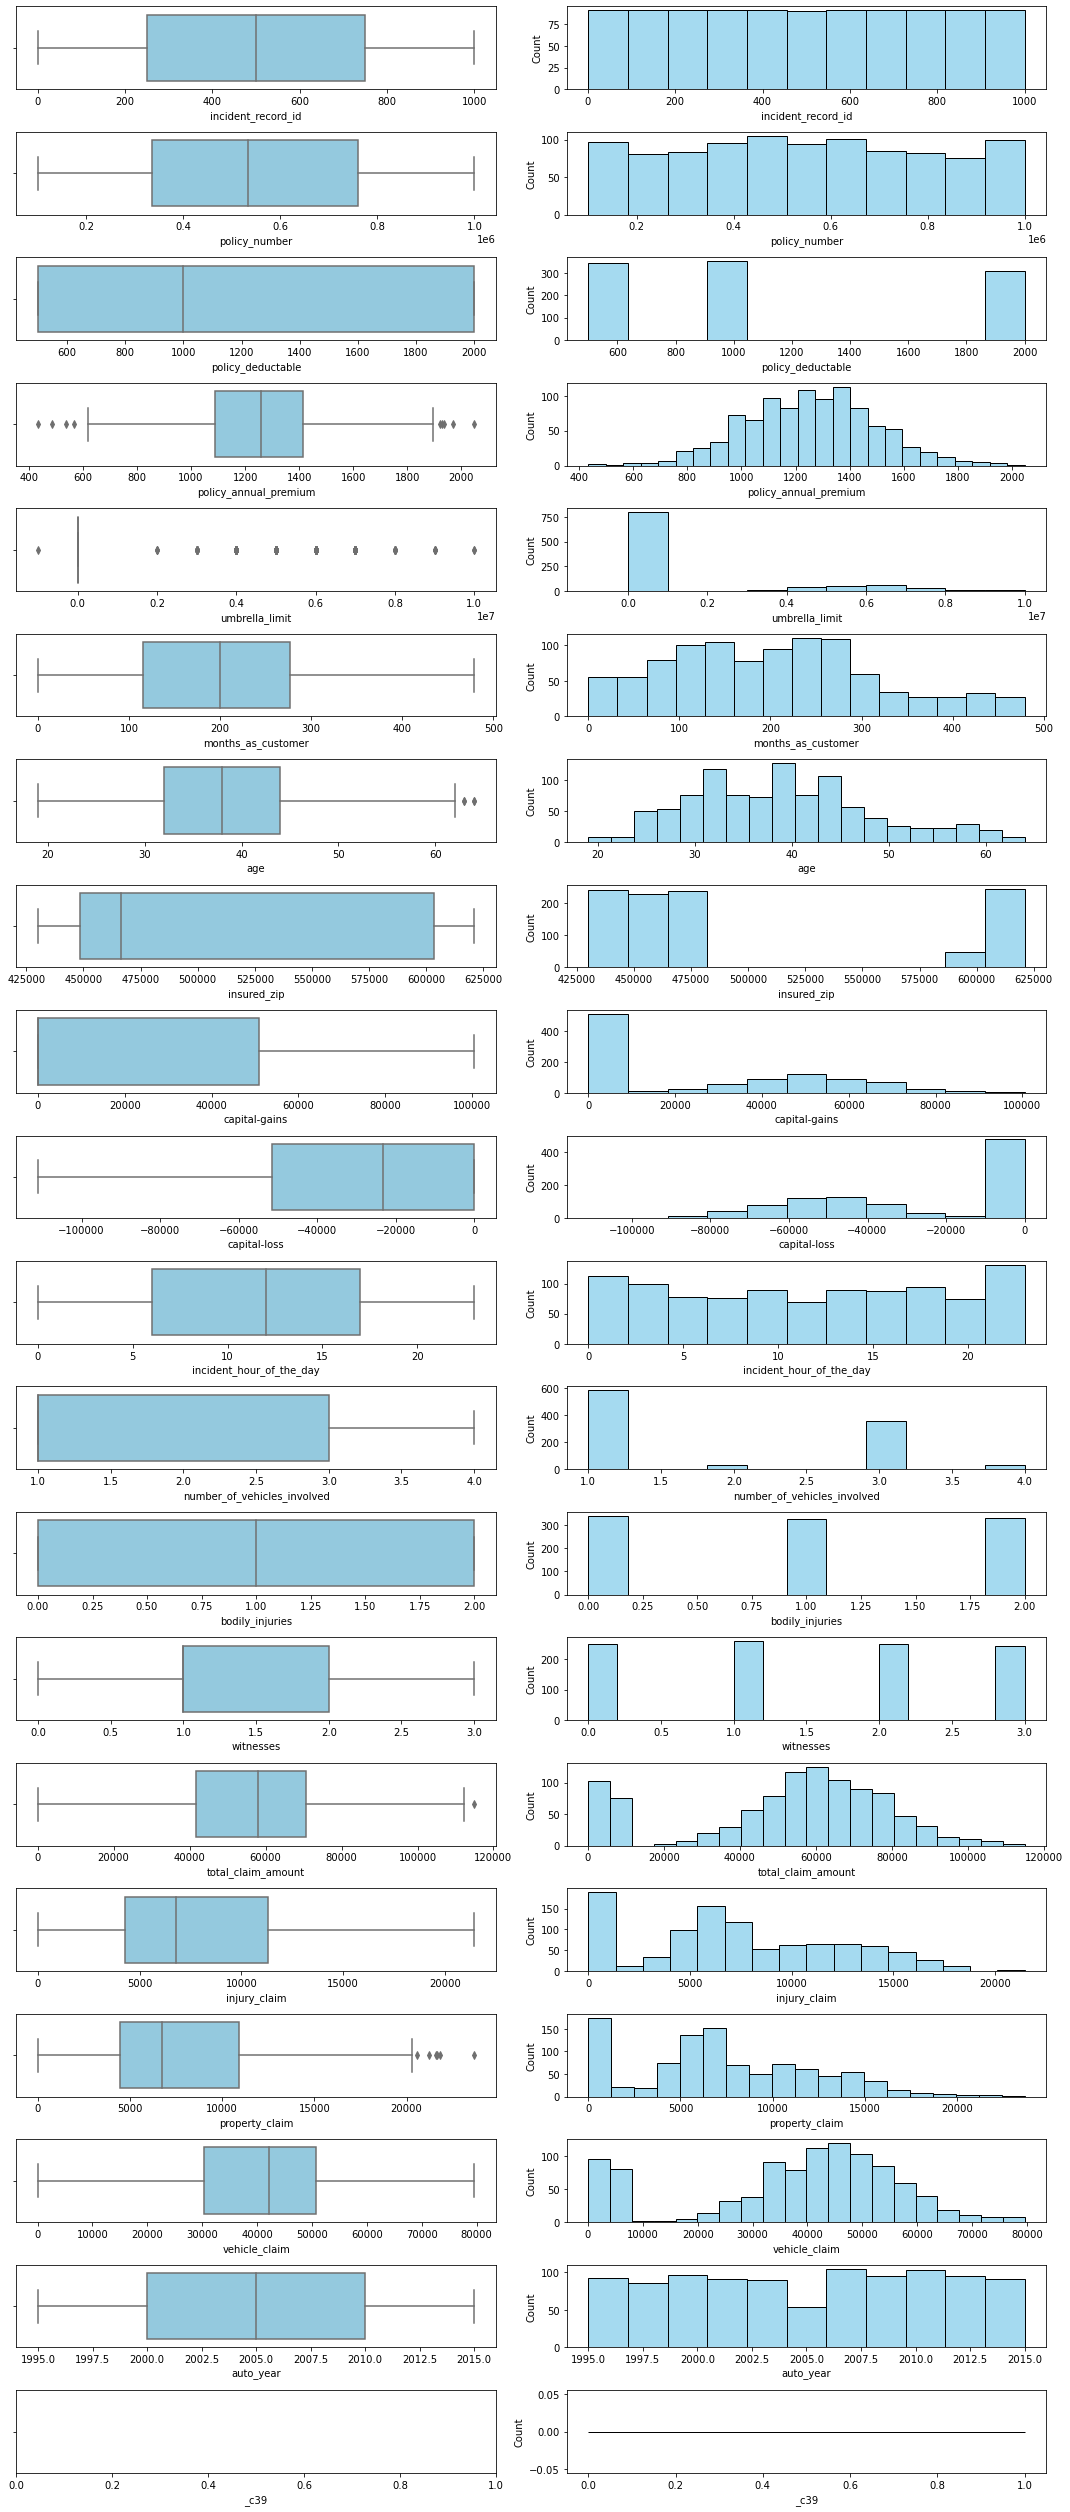

In [34]:
# Draw box plot and histogram for all numerical columns.
boxplot_histplot(dataframe = auto_insurance_dataframe, number_of_rows = 20, number_of_columns = 2, data_type = ["float64", "int64"])

**Observations:** 
- There are outliers in columns `age`, `policy_annual_premium`, `umbrella_limit`, `total_claim_amount` and `property_claim`. As outliers affect modeling, they will be investigated and cleaned later.
- Column `_c39` is blank as it has no value. This column will be cleaned later.
- None of the columns' data are normally distributed. Although columns `months_as_customer`, `age` and `policy_number` data skewed to the right; and column `policy_annual_premium` data skewed to the left, their data are very close to normally distributed. This suggests that most commonly observed values in columns `months_as_customer`, `age`, `policy_number`, `policy_annual_premium` are very close to the average value of respective column.
- Only `incident_record_id` data are uniformly distributed. Although columns `policy_deductable` and `witnesses` data skewed to the right; and column `bodily_injuries` data skewed to the left, their data are very close to uniformly distributed. This suggests that every possible value in columns `policy_deductable`, `witnesses` and `bodily_injuries` has about the equal chances of occurrence.
- Columns `umbrella_limit`, `insured_zip`, `capital-gains`, `number_of_vehicles_involved`, `injury_claim`, `property_claim`, whose data are skewed to right, have 2 peaks in the distribution of data. This suggests that these columns have 2 different groups.
    - In column `umbrella_limit`, there are 1 major group of customers who did not have umbrella insurance as their umbrella limit was \\$0; and 1 group of customers who had umbrella insurance with most observed umbrella limit at $6 million. 
    - In column `insured_zip`, there are 1 group of insured_zip with values ranged from 430,104 to 479,913; and 1 group of insured_zip with most observed values ranged from 600,127 to 619,892. 
    - In column `capital-gains`, there are 1 major group of customers who did not have capital gain as their capital gain was \\$0; and 1 group of customers who had capital gain with most observed capital gain at \\$46,300. 
    - In column `number_of_vehicles_involved`, there are 1 major group of accident with 1 vehicle involved; and 1 group of accident with 3 vehicles involved. 
    - In column `injury_claim`, there are 1 major group of low injury claims amount that ranged from \\$0 to \\$990; and 1 group with high injury claims amount whose most observed claims amounts ranged from \\$5,000 to \\$5,990.
    - Column `property_claim`, there are 1 major group of low property claims that ranged from \\$0 to \\$990; and 1 group with high property claims amount whose most observed claims amounts ranged from \\$6,000 to \\$6,990.
- Columns `capital-loss`, `total_claim_amount` and `vehicle_claim`,  whose data are skewed to left, have 2 peaks in the distribution of data. This suggests that these columns have 2 different group.
    - In column `capital-loss`, there are 1 major group of customers who did not have capital loss as their capital loss was \\$0; and 1 group of customers who had capital loss with most observed capital loss at \\$46,300.
    - In column `total_claim_amount`, there are 1 major group of with low total claims amount that ranged from \\$0 to \\$9,990; and 1 group with high total claims amount whose most observed total claims amounts ranged from \\$60,000 to \\$64,990.
    - In column `vehicle_claim`, there are 1 major group of with low vehicle claims amount that ranged from \\$0 to \\$9,990; and 1 group with high vehicle claims amount whose most observed claims amounts ranged from \\$40,000 to \\$44,990.

**Categorical Columns**

In [35]:
# Store columns with object as data type.
object_columns = auto_insurance_dataframe.select_dtypes(include=['object']).columns

# Remove both columns 'policy_bind_date' and 'incident_date' as their data types are datetime and not object.
# Sort the columns in ascending order.
object_columns = object_columns.drop(['policy_bind_date', 'incident_date']).sort_values()

# Convert to list.
object_columns = list(object_columns)

# Loop through to count frequency of categories in each column of object_columns list.
for column_index in range(len(object_columns)):
    # Count frequency of categories in each column and assign to variable "value_count"
    value_count = auto_insurance_dataframe[object_columns[column_index]].value_counts()
    # Convert variable "value_count" to dataframe.
    value_count = pd.DataFrame(value_count, columns=[object_columns[column_index]])
    # Export dataframe to csv file.
    value_count = value_count.to_csv('./datasets/value_count_' + str(object_columns[column_index]) + '.csv', index = True)                                    

Below are histogram charts created for each cateogrical column using Tableau.

![image.png](./images/tableau_authority_car_manufacturer_car_model.png)

![image.png](./images/tableau_collision_fraud_city_severity.png)

![image.png](./images/tableau_state_type_education_gender.png)

![image.png](./images/tableau_police_csl_state_damage.png)

![image.png](./images/tableau_occupation_relationship_hobbies.png)

**Observations:**
- There are 91 incidents in which authorities were not contacted.
- Cars from manufacturers Dodge, Saab and Suburu were involved in highest number of 80 incidents respectively.
- Cars from both car models RAM and Wrangler, were involved in highest and second highest number of incidents at 43 and 42 respectively.
- There are 178 incidents whose collision type is unknown as it is represented by "?".
- There are 247 fraud reported in incidents.
- Among all cities, both Springfield and Arlington had the highest and second highest number of incidents.
- Among all incidents severity, incidents with minor damage were reported the most at 354.
- Incidents took place in 7 states: North Carolina, New York, Ohio, Pennsylvania, South Carolina, Virginia and West Virginia.
- Among all states, New York and South Carolina were the top 2 states with the highest and second highest number of incidents at 262 and 248 respectively.
- Among all incidents types, multi-vehicle collision and single vehicle collision had the highest and second highest number of records at 419 and 403 respectively.
- Among all insured's education levels, juris doctor ("JD") and high school graduate were involved in the highest and second highest number of incidents at 161 and 160 respectively.
- Female insureds were involved in more incidents compared to male insureds.
- There were 343 incidents with unknown status of policy report availability as it is represented by "?". 
- Policies were issued by these 3 states: Ohio, Illinois and Indiana. 
- There were 360 incidents with unknown status of property damage as it is represented by "?".
- Among all occupations, insureds, who worked as machine operator inspector, were involved in the highest number of incidents at 93.
- Among all relationships, own child of insured was the relationship that appeared the most in the incidents at 183.
- Among all hobbies, insureds who like reading, were involved in highest number of incidents at 64. 

**Datetime Columns**

In [36]:
# Convert policy_bind_date from object to datetime.
auto_insurance_dataframe['policy_bind_date'] = pd.to_datetime(auto_insurance_dataframe['policy_bind_date'])

# Convert policy_incident_date from object to datetime.
auto_insurance_dataframe['incident_date'] = pd.to_datetime(auto_insurance_dataframe['incident_date'])

# Export policy_bind_date dataframe to csv file.
policy_bind_date = auto_insurance_dataframe['policy_bind_date'].to_csv('./datasets/policy_bind_date.csv', index = True)

# Export incident_date dataframe to csv file.
incident_date = auto_insurance_dataframe['incident_date'].to_csv('./datasets/policy_incident_date.csv', index = True)

Below are time series charts created for both `policy_bind_date` and `incident_date`, whose data type is datetime, using Tableau.

![image.png](./images/tableau_bind_incident_year.png)

![image.png](./images/tableau_policy_incident_month_week_number.png)

![image.png](./images/tableau_policy_incident_week_day_hour.png)

**Observations:**
- Policies were binded from year 1990 to year 2015.
- Policies incident dates ranged from 1 January 2015 to 1 March 2015.
- January 2015 had the highest number of incidents recorded with incidents doubled to more than 100 in week 2 and continued to record more than 100 incidents from week 3 to 4. Then, number of incidents dropped in February 2015 and continued with sharper drop in March 2015 that had the having lowest record of incidents. 
- Among all week days across January, February and March 2015, Saturday was having the highest number of incidents.
- Among all hours in a day, 3a.m., 5p.m. and 11p.m were top 3 periods with the highest, second highest and third highest number of incidents recorded respectively. 

# Key Finding

**Observations**:
- Policies were issued by these 3 states: Ohio, Illinois and Indiana.
- Incidents took place in 7 states: North Carolina, New York, Ohio, Pennsylvania, South Carolina, Virginia and West Virginia.
- Among all states, New York and South Carolina were the top 2 states with the highest and second highest number of incidents at 262 and 248 respectively.
- None of the incident occured at a same location.
- Policies, whose incident dates ranged from 1 January 2015 to 1 March 2015, were binded from year 1990 to year 2015.
- Among all 3 months, January 2015 had the highest number of incidents recorded with incidents.
- Among all week days across January, February and March 2015, Saturday was having the highest number of incidents.
- Among all hours in a day, 3a.m., 5p.m. and 11p.m were top 3 periods with the highest, second highest and third highest number of incidents recorded respectively. 
- Cars from manufacturers Dodge, Saab and Suburu were involved in highest number of 80 incidents respectively.
- Cars from both car models RAM and Wrangler, were involved in highest and second highest number of incidents at 43 and 42 respectively.
- Among all incidents types, multi-vehicle collision and single vehicle collision had the highest and second highest number of records at 419 and 403 respectively.
- Among all insured's education levels, juris doctor ("JD") and high school graduate were involved in the highest and second highest number of incidents at 161 and 160 respectively.
- Female insureds were involved in more incidents compared to male insureds.
- Among all occupations, insureds, who worked as machine operator inspector, were involved in the highest number of incidents at 93.
- Among all relationships, own child of insured was the relationship that appeared the most in the incidents at 183.
- Among all hobbies, insureds who like reading, were involved in highest number of incidents at 64.
- Columns `umbrella_limit`, `insured_zip`, `capital-gains`, `number_of_vehicles_involved`, `injury_claim`, `property_claim`, `capital-loss`, `total_claim_amount` and `vehicle_claim`, have 2 different groups as they have 2 peaks in the distribution of data.
- Average age of customer was about 39 years old (rounded to nearest number).
- Average number of months customer had insurance coverage was about 204. This translates to about 17 years.
- Average policy annual premium was about \\$1,256 (rounded to nearest number).
- Average number of vehicles involved in incidents was about 2 (rounded to nearest number).
- Average number of bodily injuries reported in incidents was about 1 (rounded to nearest number).
- Average number of witnesses involved in incidents was about 1 (rounded to nearest number).
- Average total claim amount was about \\$52,762 (rounded to nearest number).
- Average injury claim amount was about \\$7,433 (rounded to nearest number).
- Average property claim amount was about \\$7,400 (rounded to nearest number).
- Average vehicle claim amount was about \\$37,929 (rounded to nearest number).
- Average vehicle manufactured year was in year 2005.